# Задача: Сравнение методов классификации. Лямин Владимир Андреевич. Группа 22.М05
Задача
1. [+] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
2. [+] Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
3. [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
4. [+] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
5. [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
6. [+] Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
7. [+] Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
8. [+] Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
9. (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.


Рассмотрим датасет с данными по заболеванию сердца, который можно скачать тут https://github.com/rustam-azimov/ml-course/blob/main/data/heart_disease/heart.csv.

Описание датасета:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10.  oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак selling_price. Сколько стоит автомобиль. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
df = pd.read_csv('Data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Проверяем общее количество пропущенных значений.



In [4]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Вилим, что пропущенных значений нет

## Разведочный анализ (EDA)


Посмортим какие значения принимает целевой признак(болезнь сердца)

In [5]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

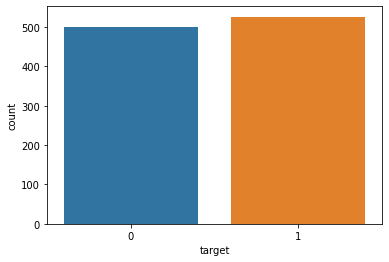

In [6]:
sns.countplot(x="target", data=df)
plt.show()

Как видно у большинсва людей в базе выявлена болезнь сердца. Это объясняется тем, что обследования в осоновном проходят больные люди. 

## Певичный анализ признаков

### Количественный признак Age


Посмотрим какие значения принмиает данный признак

In [7]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

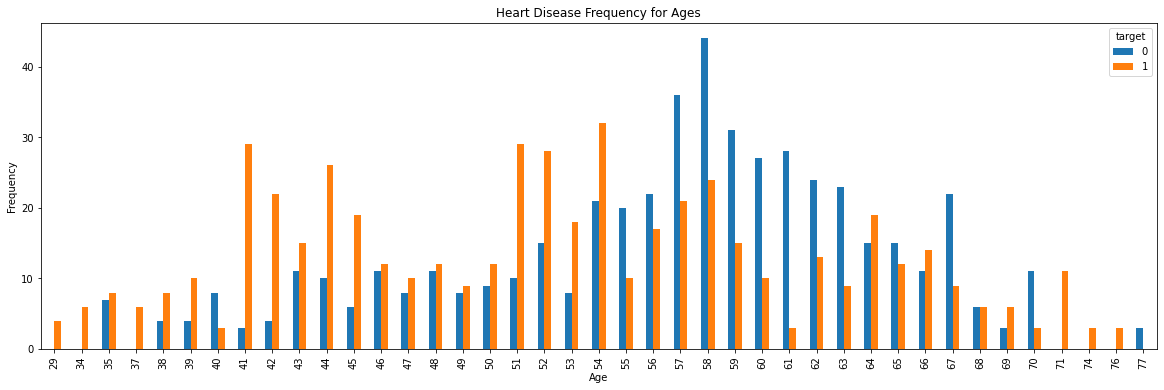

In [8]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Можем сделать вывод, что в молодые обследуются реже, чем более старшие. Также видно, что обследуются в молодом возрасте в основном больные сердечным заболеванием. У более старших возрастов процент заболевания меньше. Это можно объяснить тем, что с возрастом человек начинает более чательно следить за своим состоянием.

### Категориальный признак Sex


In [9]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

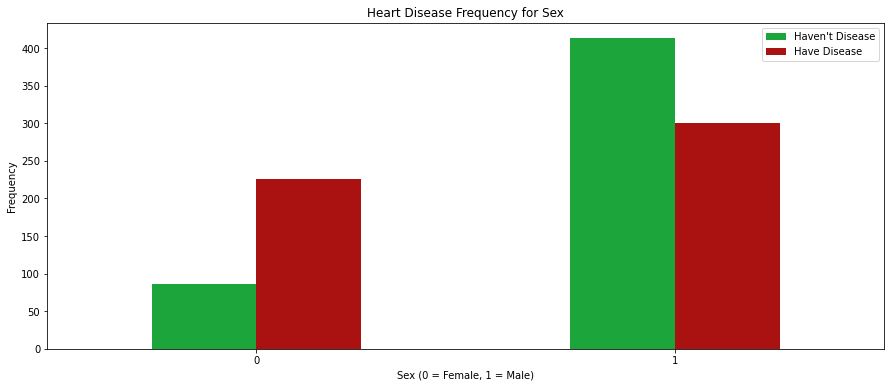

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Данная диаграмма показывает разбиение заболеваний сердца между полами. Как мы можем видеть женщины обращаются меньше, чем мужчины, но у них в процентном отношении больше заболеваний сердца.

## Категориальный признак cp

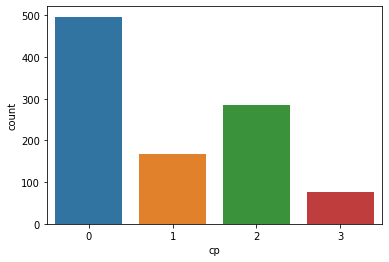

In [11]:
sns.countplot(x="cp", data=df)
plt.show()

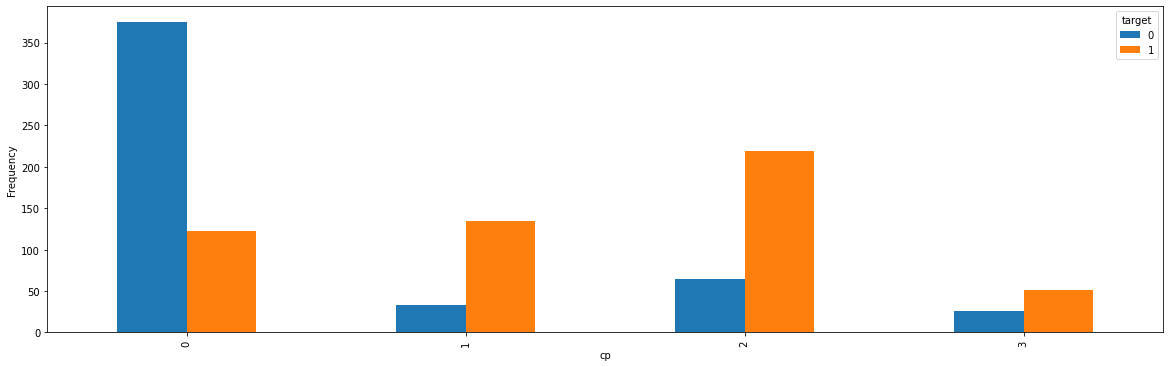

In [12]:
pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(20, 6))
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.show()

На данной диаграмме представлена зависимость заболеваний сердца от типа боли в груди. Как виднобольше всех людей обращаются к врачу с типом боли 0, но заболевания сердца у них не значительны. Тогда, как другие типы боли более показательны.

## Количесвенный признак chol

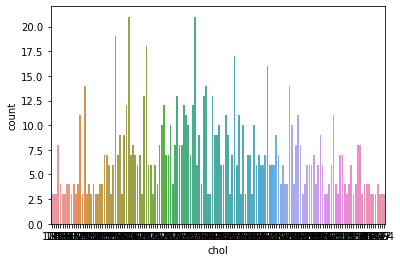

In [21]:
sns.countplot(x="chol", data=df)
plt.show()

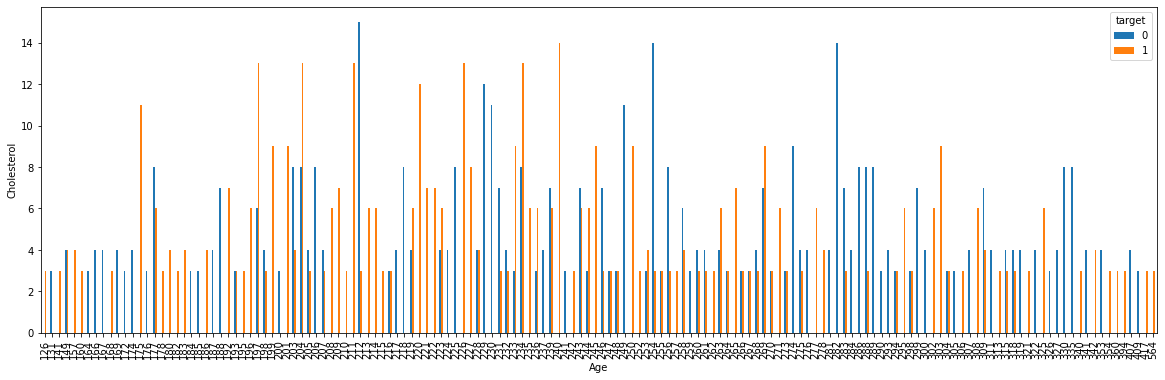

In [14]:
pd.crosstab(df.chol,df.target).plot(kind="bar", figsize=(20, 6))
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

На графике видно, что функиця заболеваний сердца от холестерина волнообразна.

## Категориальный признак fbs

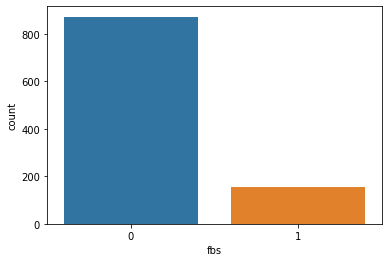

In [22]:
sns.countplot(x="fbs", data=df)
plt.show()

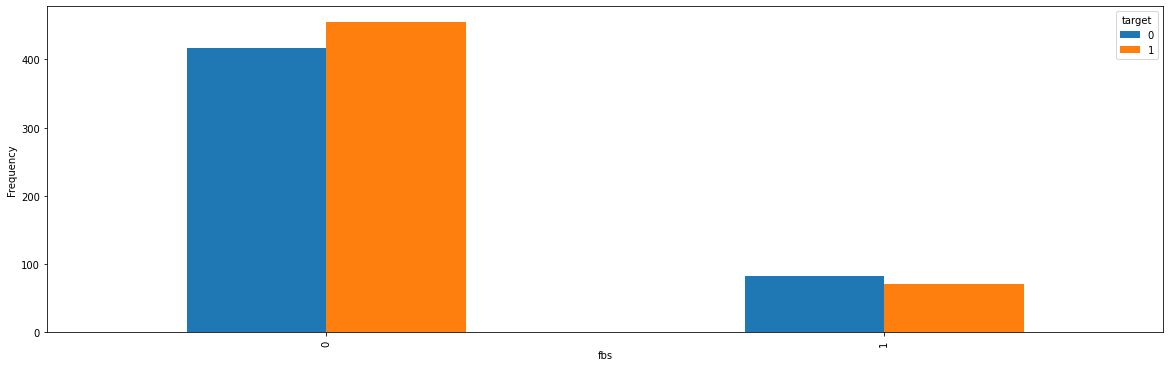

In [23]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(20, 6))
plt.xlabel('fbs')
plt.ylabel('Frequency')
plt.show()

Можно заметить, что заболевание сердца практически не зависит от уровня сахара в крови

## Категориальный признак exang

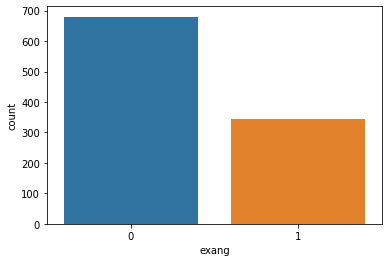

In [24]:
sns.countplot(x="exang", data=df)
plt.show()

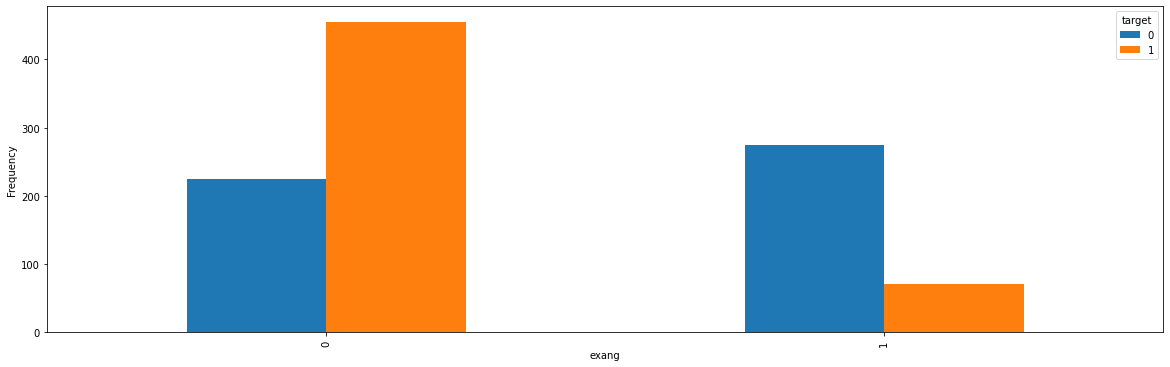

In [25]:
pd.crosstab(df.exang,df.target).plot(kind="bar", figsize=(20, 6))
plt.xlabel('exang')
plt.ylabel('Frequency')
plt.show()

Видно, что отсутвие стенохордии у людей, которые обращаются за помощью, увеличивает вероятность заболевания сердца

## Категориальный признак ca

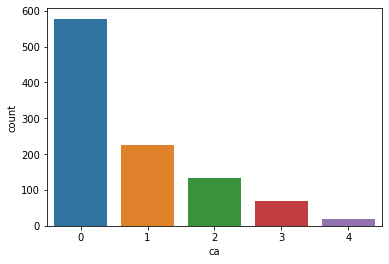

In [26]:
sns.countplot(x="ca", data=df)
plt.show()

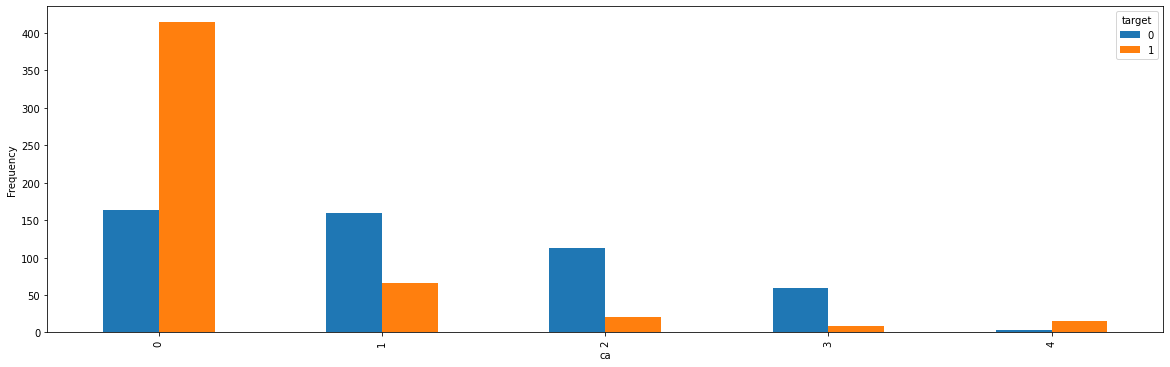

In [27]:
pd.crosstab(df.ca,df.target).plot(kind="bar", figsize=(20, 6))
plt.xlabel('ca')
plt.ylabel('Frequency')
plt.show()

На данной диаграмме можно заметить, что самое опасное - иметь один крупный сосуд, окрашенный при флюроскопии. Также опасно иметть 4 таких сосуда, но вероятность этого мала.

## Посмотрим корреляцию данных

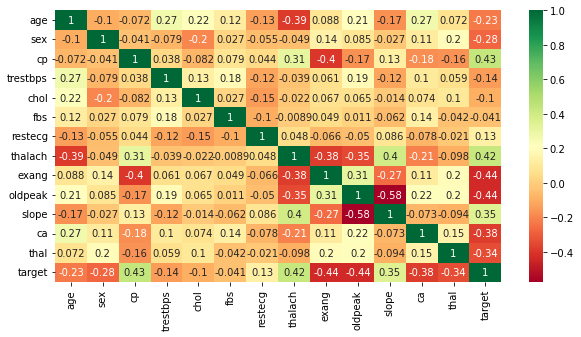

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Можно заметить, что сильной корреляции не наблюдается